In [1]:
#import sys, os
#sys.path.append(os.getcwd())
from LIMEaid.model import loadcollegedataset as gcd
from LIMEaid.controller import fitsklearnmodels as fsm
from LIMEaid.controller import LIMEaid as la
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Number of perturbed samples to be generated.
n = 100000
# Number of bins for the histograms of continous attributes.
num_bins = 25

In [2]:
def lime_display(full_data, lime_beta, lime_int):
    colors = ['k', 'b', 'm', 'c', 'g', 'y']
    classes = np.unique(full_data[:, -1])
    
    significant_attributes = 0
    for j in range(0, len(lime_beta)):
        if(lime_beta[j] != 0):
            significant_attributes = np.append(significant_attributes, j)
    significant_attributes = significant_attributes[1:]
        
    if (len(significant_attributes) == 2):
        # For visualization we separate perturbed samples classified
        # by the ML model as in-class, from those classified
        # out-of-class.
        in_class_data = full_data[full_data[:, 16] ==
                                  x_class]
        out_class_data = full_data[full_data[:, 16] !=
                                   x_class]

        plt.rcParams['figure.figsize'] = [10.0, 10.0]
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        ax.scatter(out_class_data[:, significant_attributes[0]],
                   out_class_data[:, significant_attributes[1]],
                   marker='+', c='c', label='Out of class')
        ax.scatter(in_class_data[:, significant_attributes[0]],
                   in_class_data[:, significant_attributes[1]],
                   marker='x', c='b', label='In class')
        ax.scatter(x[significant_attributes[0]],
                   x[significant_attributes[1]], marker='o',
                   c='r', label='Instance')
        ticksx = ax.set_xticks([-2, -1.5, -1, -1.5, -0.5, 0, 0.5,
                                1, 1.5, 2, 2.5])
        ticksy = ax.set_yticks([-1, 0, 1, 2, 3, 4, 5, 6, 7])
        plt.grid(b=True, which='both', color='0.85', linestyle='-')
        ax.set_xlabel(features[significant_attributes[0]])
        ax.set_ylabel(features[significant_attributes[1]])
        plt.legend(loc='upper left')
    
    # Displaying regression values for perturbed samples.
    plt.rcParams['figure.figsize'] = [5.0, 10.0]
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    # Compute all LIME regression values for all perturbed samples
    # and for the instance to be explained, and plot them.
    for j in range(0, len(classes)):
        class_reg = full_data[full_data[:, -1] == classes[j]]
        class_reg = np.sum(class_reg[:, :-1] * lime_beta, axis=1) + lime_int
        ax.scatter(np.zeros(len(class_reg)) + j, class_reg, marker='o',
                   c=colors[j])
    instance = sum(x * lime_beta) + lime_int
    ax.scatter(x_class, instance, marker='o', c='r')
    ticksx = ax.set_xticks([0, 1, 2])
    labelsx = ax.set_xticklabels(['0', '1', '2'])
    ax.set_ylabel('LIME Regression')
    plt.grid(b=True, which='both', color='0.85', linestyle='-')

In [3]:
college = gcd.loadcollegedataset()
features = list(college)[1:]
salary_class = np.array(college.iloc[:, 0])
college = np.array(college.iloc[:, 1:])

<_io.TextIOWrapper name='C:\\Users\\Castor18\\OneDrive\\MSDS_UW\\Data515_Spr19_Sw_Eng\\myproject\\LIMEaid\\LIMEaid\\model\\../data/Most-_Recent-_Cohorts-_Scorecard-_Elements.csv' mode='r' encoding='cp1252'>


In [4]:
clf = fsm.fitmulticlasslogisticregression()

<_io.TextIOWrapper name='C:\\Users\\Castor18\\OneDrive\\MSDS_UW\\Data515_Spr19_Sw_Eng\\myproject\\LIMEaid\\LIMEaid\\model\\../data/Most-_Recent-_Cohorts-_Scorecard-_Elements.csv' mode='r' encoding='cp1252'>


C:\Users\Castor18\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Castor18\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Castor18\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Castor18\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Castor18\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iteration

In [5]:
perturbed_samples = la.lime_sample(n, False, college[:, 0], num_bins)
for j in range(1, college.shape[1]):
    array = college[:, j]
    output = la.lime_sample(n, True, array, num_bins)
    perturbed_samples = np.vstack((perturbed_samples, output))
perturbed_samples = np.transpose(perturbed_samples)

In [6]:
class_perturb_samples = clf.predict(perturbed_samples)

In [7]:
college_norm = preprocessing.scale(college)
# Selecting the instance to interpret.
inst_num = np.round(np.random.uniform(0, college_norm.shape[0], 1))
inst_num = inst_num[0].astype(int)
# x is the selected instance, and x_class is the class assigned
# by the decision tree. 
x = college_norm[inst_num, :]
x_class = salary_class[inst_num]

In [8]:
# We now fit the LIME linear model to get the coefficients and
# intercept, as well as the weight of each random sample, 
# based on its L2 distance to the instance that is being
# interpreted.
lime_beta, lime_int, lime_weigh = la.lime_fit(x,
                                              x_class,
                                              perturbed_samples,
                                              class_perturb_samples)

C:\Users\Castor18\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Castor18\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Castor18\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Castor18\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might wa

In [9]:
# Print output of LIME results.
print("Instance to be interpreted:")
for j in range(0, len(lime_beta)):
    print("Feature: ", features[j], "\tvalue: ",
          college[inst_num, j], "\tnormalized value: ",
          college_norm[inst_num, j])
print("Classification: ", x_class)
print("\nSignificant coefficients from LIME adjusted"
      " linear model:")
significant_attributes = 0
for j in range(0, len(lime_beta)):
    if(lime_beta[j] != 0):
        significant_attributes = np.append(significant_attributes, j)
        print("Feature: ", features[j],
              "\tCoefficient: ", lime_beta[j])
significant_attributes = significant_attributes[1:]
print("Intercept: ", lime_int)

Instance to be interpreted:
Feature:  HCM2 	value:  0.0 	normalized value:  0.0
Feature:  SATVR25 	value:  660.0 	normalized value:  1.520412075926771
Feature:  SATVR75 	value:  730.0 	normalized value:  1.1381204620496448
Feature:  SATMT25 	value:  660.0 	normalized value:  1.2860030244407572
Feature:  SATMT75 	value:  730.0 	normalized value:  0.9116992115900733
Feature:  SATWR25 	value:  640.0 	normalized value:  1.191305056828449
Feature:  SATWR75 	value:  730.0 	normalized value:  1.1113861049863194
Feature:  ACTCM25 	value:  30.0 	normalized value:  1.4586684238320704
Feature:  ACTCM75 	value:  33.0 	normalized value:  1.2796839727509421
Feature:  ACTEN25 	value:  30.0 	normalized value:  1.7139841519850936
Feature:  ACTEN75 	value:  35.0 	normalized value:  1.7663346242884956
Feature:  ACTMT25 	value:  29.0 	normalized value:  1.7007236187151427
Feature:  ACTMT75 	value:  34.0 	normalized value:  1.824310397674112
Feature:  ACTWR25 	value:  7.408163265306122 	normalized value:  

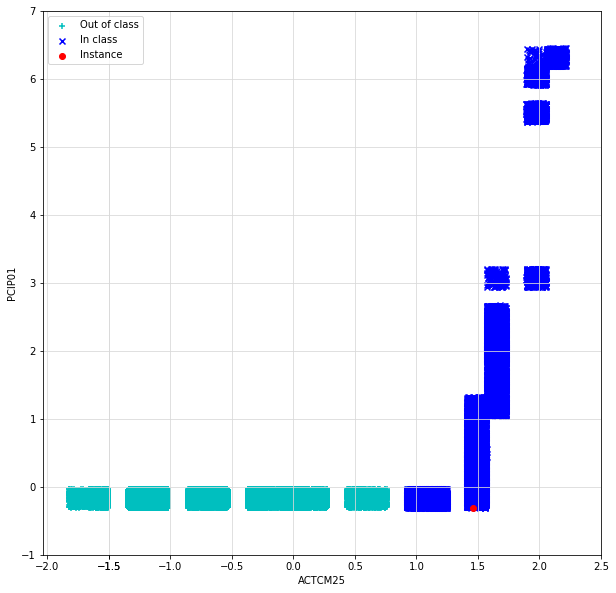

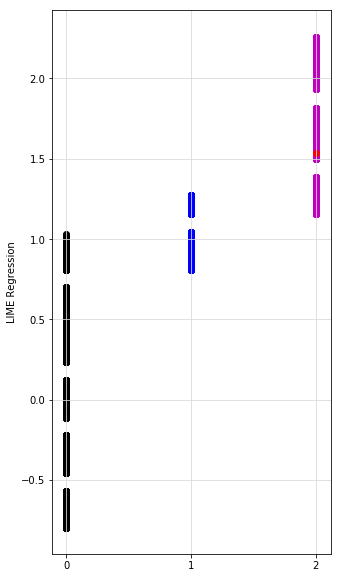

In [10]:
full_data = np.column_stack((perturbed_samples, class_perturb_samples))
lime_display(full_data, lime_beta, lime_int)